In [13]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# To plot pretty figures
%matplotlib inline

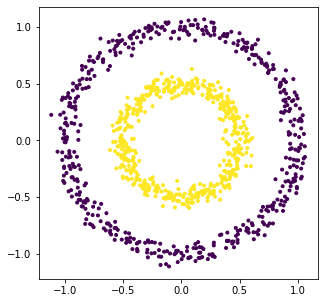

In [14]:
# generating data.
X, y = make_circles(n_samples=1000, factor=0.5, noise=.05, random_state=42) 

# visualizing data.
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.') 
plt.show()

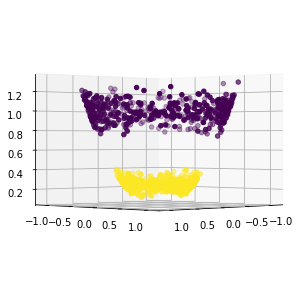

In [15]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = X1**2 + X2**2
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X1, X2, X3, c=y, depthshade=True) 
ax.view_init(0, 45)
plt.show() 

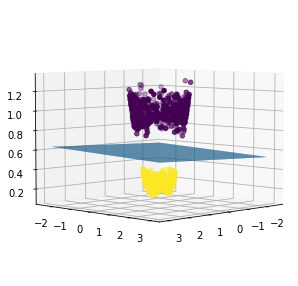

In [16]:
svc = svm.SVC(kernel='linear') 
svc.fit(X, y) 

# plotting the separating hyperplane 
tmp = np.linspace(-2.5,3,200)
x1, x2 = np.meshgrid(tmp, tmp) 
x3 = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*(x)-svc.coef_[0][1]*(y)) / (svc.coef_[0][2])

fig = plt.figure(figsize=(5,5))
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X3, c = y, depthshade = True) 
axes2.view_init(5, 45)
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3(x1,x2)) 
plt.show()